In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

## Task 3 Member Notebook: Derek Fox
### First, read in data from covid csv and filter to last week of 2020

In [2]:
# Read in COVID19 data from csv
covid_data = pd.read_csv('./data/super_covid_data.csv')
covid_data

,countyFIPS,County Name,State,StateFIPS,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,2020-01-27_cases,...,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths,population
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,55869
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,223234
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,24686
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,22394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3130,56037,Sweetwater County,WY,56,0,0,0,0,0,0,...,142,142,142,142,142,142,142,142,142,42343
3131,56039,Teton County,WY,56,0,0,0,0,0,0,...,16,16,16,16,16,16,16,16,16,23464
3132,56041,Uinta County,WY,56,0,0,0,0,0,0,...,43,43,43,43,43,43,43,43,43,20226
3133,56043,Washakie County,WY,56,0,0,0,0,0,0,...,51,51,51,51,51,51,51,51,51,7805


In [3]:
# move the population column to the 5th column for convenience
def move_column(df, col, pos):
    col = df.pop(col)
    df.insert(pos, col.name, col)
move_column(covid_data, 'population', 4)
covid_data.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,...,2023-07-14_deaths,2023-07-15_deaths,2023-07-16_deaths,2023-07-17_deaths,2023-07-18_deaths,2023-07-19_deaths,2023-07-20_deaths,2023-07-21_deaths,2023-07-22_deaths,2023-07-23_deaths
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,55869,0,0,0,0,0,...,235,235,235,235,235,235,235,235,235,235
2,1003,Baldwin County,AL,1,223234,0,0,0,0,0,...,731,731,731,731,731,731,731,731,731,731
3,1005,Barbour County,AL,1,24686,0,0,0,0,0,...,104,104,104,104,104,104,104,104,104,104
4,1007,Bibb County,AL,1,22394,0,0,0,0,0,...,111,111,111,111,111,111,111,111,111,111


In [4]:
# Filter to only 2020 data
year_2020_data = covid_data.filter(like='2020')
covid_2020_data = pd.concat([covid_data.iloc[:, :5], year_2020_data], axis=1)
covid_2020_data.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,...,2020-12-22_deaths,2020-12-23_deaths,2020-12-24_deaths,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,55869,0,0,0,0,0,...,44,46,46,46,46,47,47,47,48,48
2,1003,Baldwin County,AL,1,223234,0,0,0,0,0,...,149,151,151,151,151,152,152,156,160,161
3,1005,Barbour County,AL,1,24686,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
4,1007,Bibb County,AL,1,22394,0,0,0,0,0,...,42,42,42,42,42,42,42,42,46,46


In [5]:
# Focusing on the state of Florida
STATE = 'Florida'
STATE_ABBR = 'FL'
florida_2020_data = covid_2020_data[covid_2020_data['State'] == STATE_ABBR]
florida_2020_data.head()

,countyFIPS,County Name,State,StateFIPS,population,2020-01-22_cases,2020-01-23_cases,2020-01-24_cases,2020-01-25_cases,2020-01-26_cases,...,2020-12-22_deaths,2020-12-23_deaths,2020-12-24_deaths,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths
318,0,Statewide Unallocated,FL,12,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
319,12001,Alachua County,FL,12,269043,0,0,0,0,0,...,116,116,116,116,122,124,128,128,128,129
320,12003,Baker County,FL,12,29210,0,0,0,0,0,...,36,36,36,36,36,36,36,36,36,36
321,12005,Bay County,FL,12,174705,0,0,0,0,0,...,193,196,197,197,197,202,203,203,205,209
322,12007,Bradford County,FL,12,28201,0,0,0,0,0,...,22,22,22,22,23,23,23,23,23,23


In [6]:
# Just get data on cases in the last week of 2020
florida_2020_cases = florida_2020_data.filter(like='cases')
florida_last_week_cases = florida_2020_cases.iloc[:, -7:]
florida_last_week_cases.head()

,2020-12-25_cases,2020-12-26_cases,2020-12-27_cases,2020-12-28_cases,2020-12-29_cases,2020-12-30_cases,2020-12-31_cases
318,3036,3067,3080,3088,3082,3062,3010
319,15182,15370,15420,15473,15574,15674,15866
320,2374,2395,2397,2414,2432,2453,2470
321,11124,11302,11358,11403,11540,11753,11907
322,2056,2090,2103,2118,2137,2163,2180


### Plot data to observe trends. Plotting each county as cases vs. time (in days)

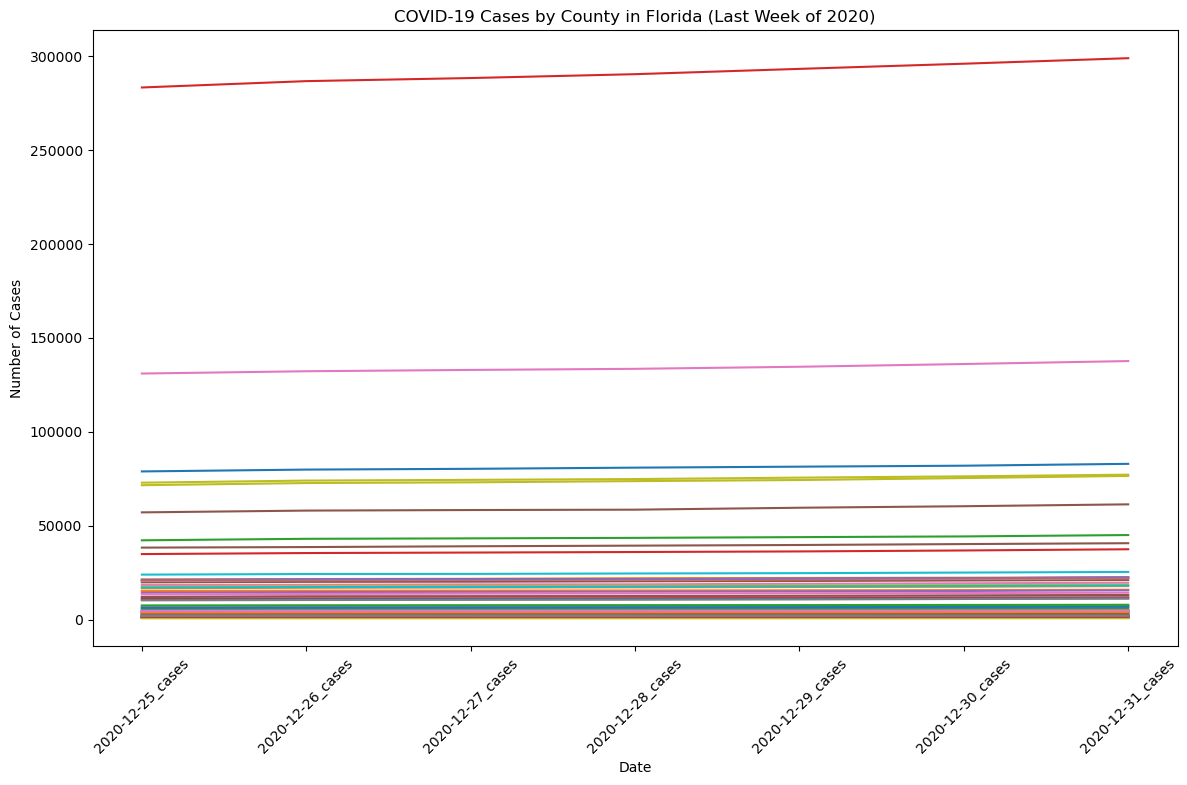

In [7]:
plt.figure(figsize=(14, 8))
for county in florida_last_week_cases.index:
    plt.plot(florida_last_week_cases.columns, florida_last_week_cases.loc[county])

plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases by County in Florida (Last Week of 2020)')
plt.xticks(rotation=45)
plt.show()

### The above cell shows that the cases were trending up slightly in the last week of 2020.

## Now, read in presidential election data and display

In [8]:
# Read in presidential election dataset from csv
pres_by_county = pd.read_csv('./data/president_county_candidate.csv')
pres_by_county

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
...,...,...,...,...,...,...
32172,Arizona,Maricopa County,Write-ins,WRI,1331,False
32173,Arizona,Mohave County,Donald Trump,REP,78535,True
32174,Arizona,Mohave County,Joe Biden,DEM,24831,False
32175,Arizona,Mohave County,Jo Jorgensen,LIB,1302,False


## Finally, merge the two datasets on state and county

In [9]:
# COVID19 dataset uses state abbreviations, but presidential election uses full state names.
# So we need a way to map between the two.
state_name_to_abbr = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY"
}

In [10]:
# Add state abbreviation column
pres_by_county['state_abbr'] = pres_by_county['state'].map(state_name_to_abbr)
pres_by_county.head()
# Merge the two dataframes on the state abbreviation and county columns
merged = pd.merge(covid_2020_data, pres_by_county, left_on=['State', 'County Name'], right_on=['state_abbr', 'county'])

merged = merged.drop(columns=['state_abbr', 'county'])

In [11]:
# Do a little cleaning, for later
merged.rename(columns={'State': 'StateAbbr', 'County Name': 'County'}, inplace=True)
move_column(merged, 'state', 2)
move_column(merged, 'candidate', 6)
move_column(merged, 'party', 7)
move_column(merged, 'total_votes', 8)
move_column(merged, 'won', 9)

merged

,countyFIPS,County,state,StateAbbr,StateFIPS,population,candidate,party,total_votes,won,...,2020-12-22_deaths,2020-12-23_deaths,2020-12-24_deaths,2020-12-25_deaths,2020-12-26_deaths,2020-12-27_deaths,2020-12-28_deaths,2020-12-29_deaths,2020-12-30_deaths,2020-12-31_deaths
0,1001,Autauga County,Alabama,AL,1,55869,Donald Trump,REP,19838,True,...,44,46,46,46,46,47,47,47,48,48
1,1001,Autauga County,Alabama,AL,1,55869,Joe Biden,DEM,7503,False,...,44,46,46,46,46,47,47,47,48,48
2,1001,Autauga County,Alabama,AL,1,55869,Jo Jorgensen,LIB,350,False,...,44,46,46,46,46,47,47,47,48,48
3,1001,Autauga County,Alabama,AL,1,55869,Write-ins,WRI,79,False,...,44,46,46,46,46,47,47,47,48,48
4,1003,Baldwin County,Alabama,AL,1,223234,Donald Trump,REP,83544,True,...,149,151,151,151,151,152,152,156,160,161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19299,56045,Weston County,Wyoming,WY,56,6927,Donald Trump,REP,3107,True,...,2,2,2,2,2,2,2,2,2,2
19300,56045,Weston County,Wyoming,WY,56,6927,Joe Biden,DEM,360,False,...,2,2,2,2,2,2,2,2,2,2
19301,56045,Weston County,Wyoming,WY,56,6927,Jo Jorgensen,LIB,46,False,...,2,2,2,2,2,2,2,2,2,2
19302,56045,Weston County,Wyoming,WY,56,6927,Brock Pierce,IND,20,False,...,2,2,2,2,2,2,2,2,2,2


In [12]:
# Save the merged dataset to a csv file for later use
save_loc = './data/covid_and_pres_county.csv'
if not os.path.exists(save_loc):
    merged.to_csv(save_loc)